In [48]:
import shapely#.geometry import Point, LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

import importlib
import GeoPath
importlib.reload(GeoPath)

import GeoGraph
importlib.reload(GeoGraph)

from joblib import Parallel, delayed
import multiprocessing

In [49]:
gdf = gpd.read_file("./MEX/MEX_ADM2_fixedInternalTopology.shp")
gdf = gdf[['shapeID', 'geometry']]
# gdf.head()

match = pd.read_csv("./gB_IPUMS_match.csv")
match = match[['shapeID', 'MUNI2015']]
ref_dict = dict(zip(match['MUNI2015'], match['shapeID']))
# match.head()

df = pd.read_csv("./mexico2010.csv")
df = df[['GEO2_MX', 'sum_income', 'total_pop', 'unrel_ppl', 'perc_urban', 'sum_num_intmig']]
df['GEO2_MX'] = df['GEO2_MX'].astype(str).str.replace("484", "").astype(int).map(ref_dict)
df = df.rename(columns = {'GEO2_MX': 'shapeID'})
# df.head()

df = df.dropna(subset = ['shapeID'])

shapeIDs = df['shapeID'].to_list()[0:5]

degrees = 2

# target_id = random.choice(df['shapeID'].to_list())
# degrees = random.randint(1, 4)

In [50]:
gdf = pd.merge(gdf, df, on = "shapeID")
gdf.head()

,shapeID,geometry,sum_income,total_pop,unrel_ppl,perc_urban,sum_num_intmig
0,MEX-ADM2-1590546715-B1,"POLYGON ((-101.99941 22.21951, -101.99940 22.2...",3998425640,45951.0,0.006768,0.269853,4017.0
1,MEX-ADM2-1590546715-B3,"POLYGON ((-102.18902 22.36244, -102.18951 22.3...",2552472383,7164.0,0.000000,0.563931,988.0
2,MEX-ADM2-1590546715-B4,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",2072625818,20048.0,0.000000,0.416750,1446.0
3,MEX-ADM2-1590546715-B5,"POLYGON ((-102.32431 21.93627, -102.32438 21.9...",3028539049,100150.0,0.019251,0.669675,7551.0
4,MEX-ADM2-1590546715-B7,"POLYGON ((-102.32356 21.93671, -102.32349 21.9...",22382867663,849101.0,0.018720,0.892990,42055.0


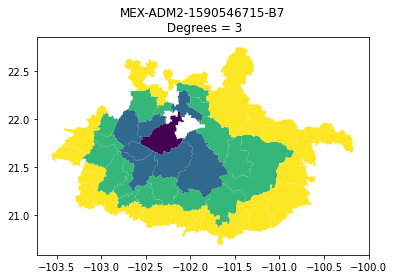

In [51]:
g = GeoGraph.GeoGraph(shapeIDs[0], gdf, load_data = True, degrees = 3)
g.show()

In [52]:
g.x

array([[2.23828685e+10, 8.49101000e+05, 1.87197998e-02, 8.92990351e-01],
       [3.99842560e+09, 4.59510000e+04, 6.76807901e-03, 2.69852668e-01],
       [3.02853914e+09, 1.00150000e+05, 1.92511231e-02, 6.69675469e-01],
       [3.04586010e+09, 5.31420000e+04, 1.13845924e-02, 4.93884295e-01],
       [2.93681075e+09, 5.12250000e+04, 6.28599338e-03, 5.98965347e-01],
       [2.88190515e+09, 4.13210000e+04, 4.50134324e-03, 7.01846540e-01],
       [7.19286835e+09, 1.52238000e+05, 1.31964423e-02, 6.63783014e-01],
       [2.33626317e+09, 1.78390000e+04, 1.20522454e-02, 7.97129869e-01],
       [6.53055027e+09, 8.89420000e+04, 3.57536366e-03, 7.26271033e-01],
       [3.51386778e+09, 2.37450000e+04, 1.17919566e-02, 2.95009464e-01],
       [2.62225024e+09, 1.82650000e+04, 0.00000000e+00, 4.54640031e-01],
       [1.99323174e+09, 1.11510000e+04, 1.34517089e-03, 4.98520315e-01],
       [2.69859302e+09, 2.33660000e+04, 4.43379283e-02, 6.24026358e-01],
       [2.20587494e+09, 6.08800000e+03, 1.97109068e

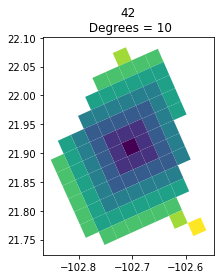

In [7]:
gdf2 = gpd.read_file("/home/hbaier/Desktop/temp/data/MEX4/imagery_bboxes/484001003.shp")
gdf2['boxID'] = [str(i) for i in range(len(gdf2))]
gdf2.columns = ['muni', 'geometry', 'shapeID']
gdf2.head()

g = GeoGraph.GeoGraph('search', gdf2, x = True, degrees = 10)
g.show()